c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


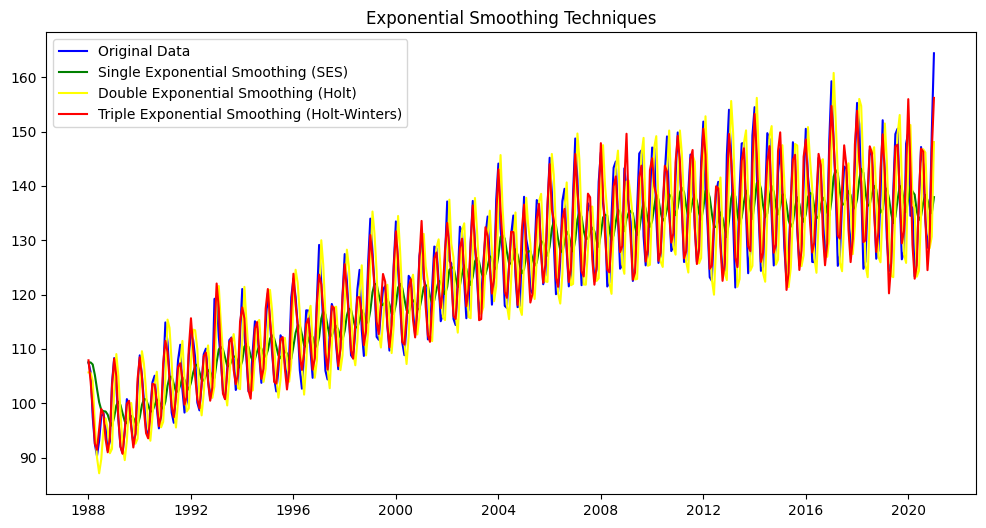

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

df = pd.read_csv("../COD2/ML471_S2_Datafile_Concept(in).csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

model_ses = SimpleExpSmoothing(df['Consumption']).fit(smoothing_level=0.2, optimized=False)
df['SES'] = model_ses.fittedvalues

model_holt = Holt(df['Consumption']).fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
df['Holt'] = model_holt.fittedvalues

model_hw = ExponentialSmoothing(df['Consumption'], trend='add', seasonal='add', seasonal_periods=12).fit()
df['Holt-Winters'] = model_hw.fittedvalues

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Consumption'], label='Original Data', color='blue')
plt.plot(df.index, df['SES'], label='Single Exponential Smoothing (SES)', color='green')
plt.plot(df.index, df['Holt'], label='Double Exponential Smoothing (Holt)', color='yellow')
plt.plot(df.index, df['Holt-Winters'], label='Triple Exponential Smoothing (Holt-Winters)', color='red')

plt.title('Exponential Smoothing Techniques')
plt.legend()
plt.show()